# Loan Status ML Predication

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio ## graph ke templates ke liye
import plotly.colors as colors
pio.templates.default= 'plotly_white'

In [49]:
df= pd.read_csv(r'C:\Users\UsEr\Downloads\loan_data (1).csv')
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [3]:
df.shape

(45000, 14)

# EDA Steps Apply

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [6]:
## Check data type of numerical features
df.select_dtypes(include='object').columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [7]:
## Check data type of categorical features
df.select_dtypes(include='number').columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

In [8]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [9]:
## Check Null values
df.isna().sum()
## There are no null values present

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [10]:
## Check Duplicate
df.duplicated().sum()
## There are no duplicate values present

0

## Add some new Columns

In [50]:
def income_category(income):
    if income < 35000:
        return 'Low Class'
    elif 35000 <= income <= 100000:
        return 'Middle Class'
    else:
        return 'High Class'
df['Class Label']= df['person_income'].apply(income_category)
df.head(2)

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   

  previous_loan_defaults_on_file  loan_status   Class Label  
0                             No            1  Middle Class  
1                            Yes            0     Low Class

In [5]:
df['person_income'].describe()

count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64

## Distribution Plot of Numerical columns

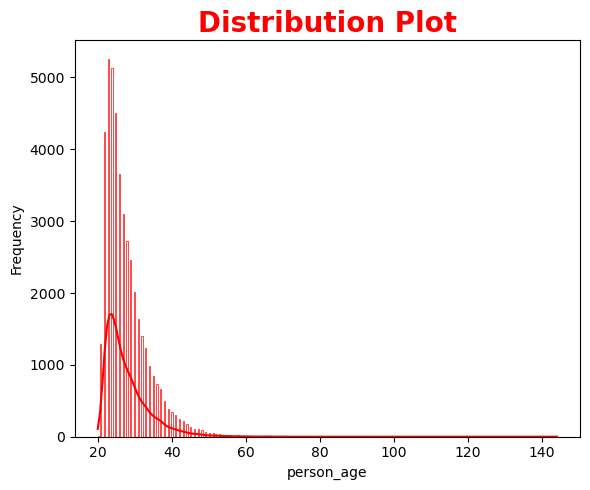

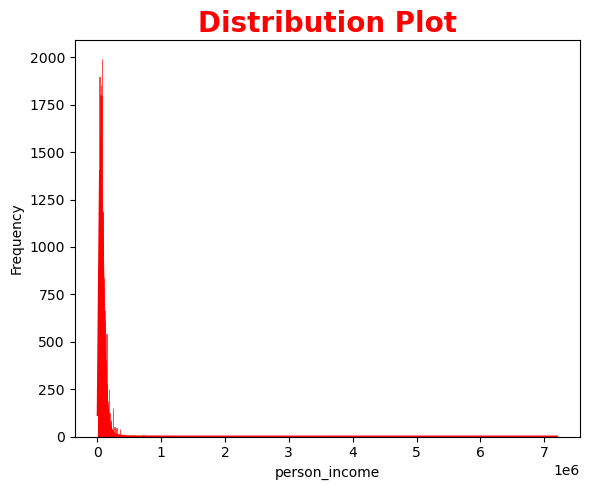

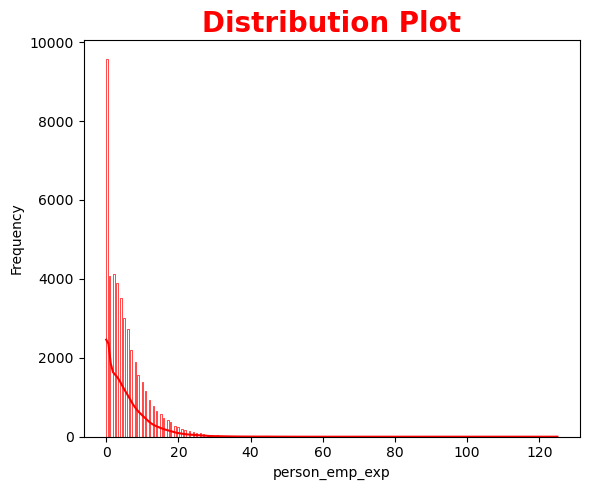

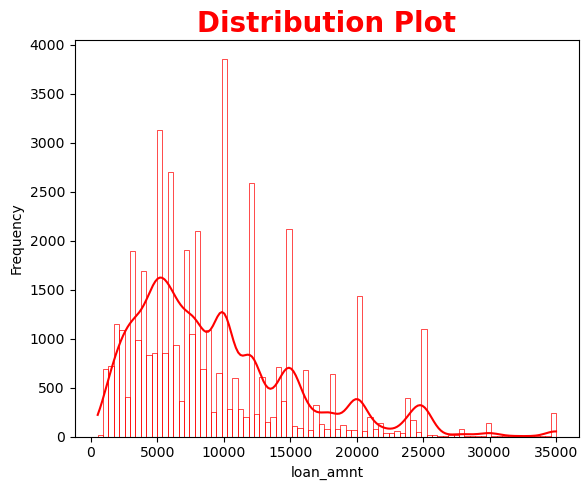

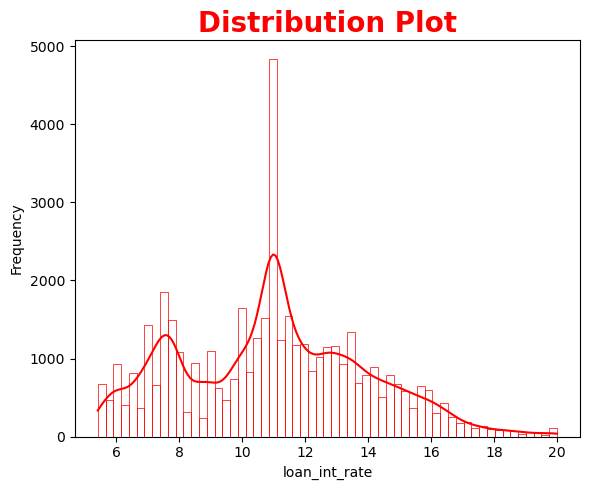

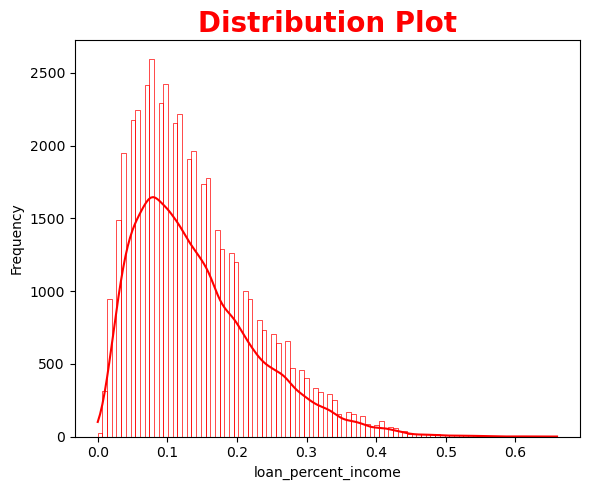

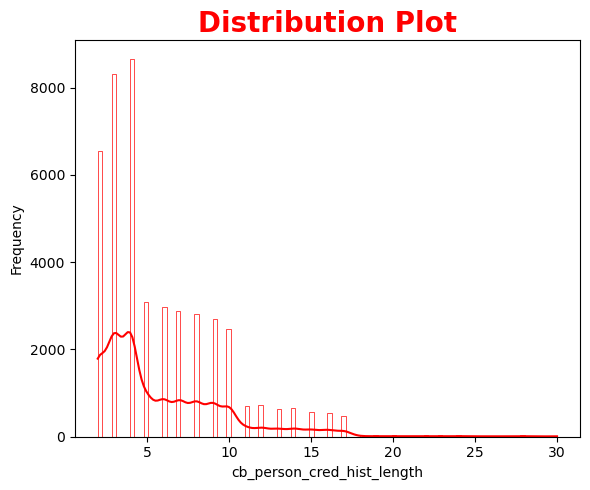

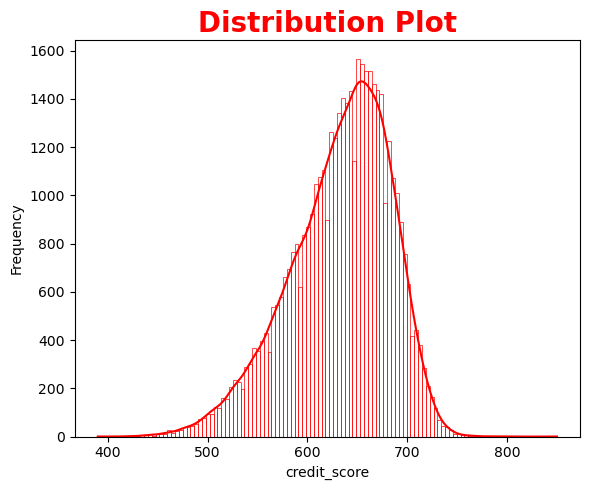

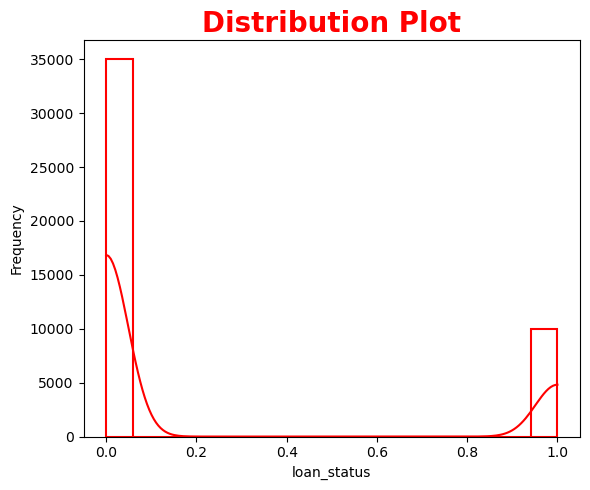

In [13]:
num_cols = df.select_dtypes(include='number').columns

for i in num_cols:
    plt.figure(figsize=(6, 5))
    sns.histplot(df[i], kde=True, fill=False, color='red')
    plt.title('Distribution Plot', fontsize=20, weight='bold', color='red')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Summarize & Visulalize Dataset

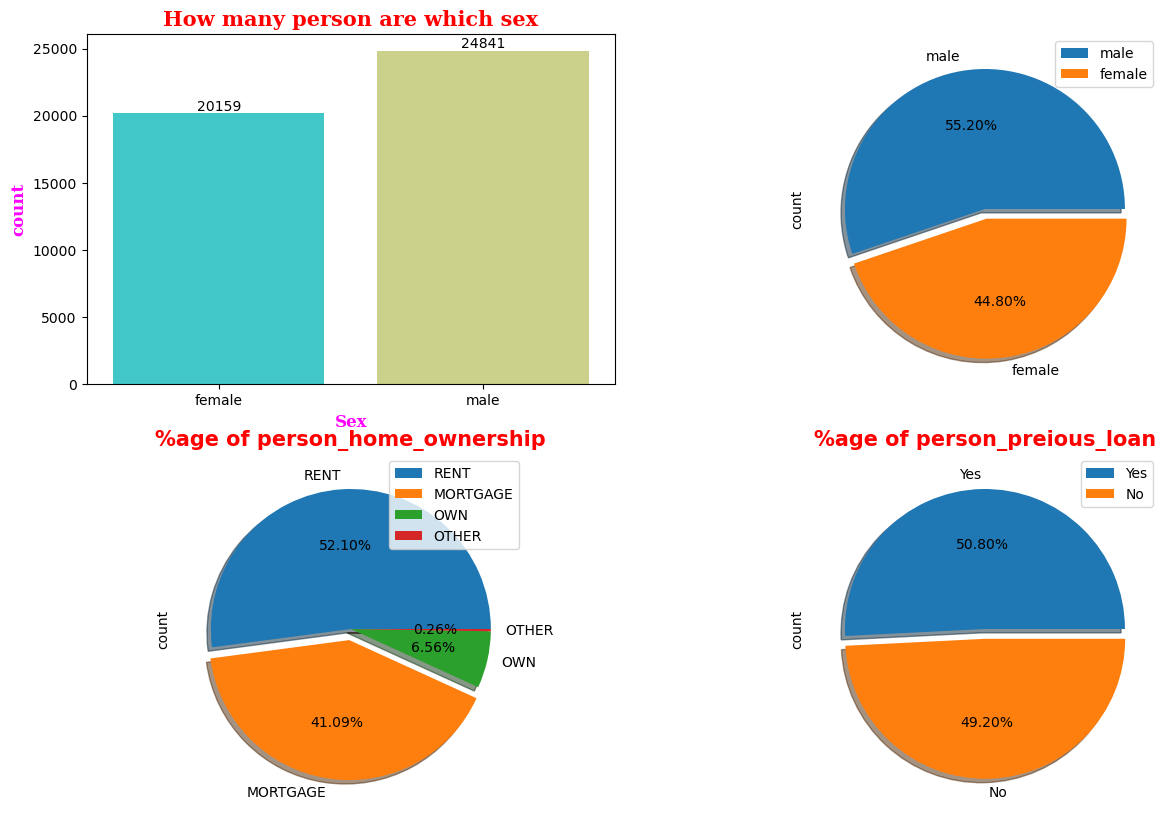

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax=sns.countplot(x=df['person_gender'],palette='rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('How many person are which sex',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
plt.xlabel('Sex',fontdict={
    'fontsize': 12,
    'color': 'magenta',
    'weight': 'bold',
    'family': 'serif'})
plt.ylabel('count',fontdict={
    'fontsize': 12,
    'color': 'magenta',
    'weight': 'bold',
    'family': 'serif'})

plt.subplot(2,2,2)
df['person_gender'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%',explode=[0,0.07])
plt.legend(loc='upper right')

plt.subplot(2,2,3)
df['person_home_ownership'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%',explode=[0,0.08,0,0])
plt.legend(loc='upper right')
plt.title('%age of person_home_ownership',color='red',weight='bold',fontsize=15)

plt.subplot(2,2,4)
df['previous_loan_defaults_on_file'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%',explode=[0,0.07])
plt.legend(loc='upper right')
plt.title('%age of person_preious_loan',color='red',weight='bold',fontsize=15)

plt.show()

In [40]:
pivot= df.pivot_table(values='loan_status',index='person_home_ownership',columns='Class Label',aggfunc='count')
pivot

Class Label            High Class  Low Class  MIddle Class
person_home_ownership                                     
MORTGAGE                     6821        454         11214
OTHER                          28         10            79
OWN                           449        668          1834
RENT                         2726       3350         17367

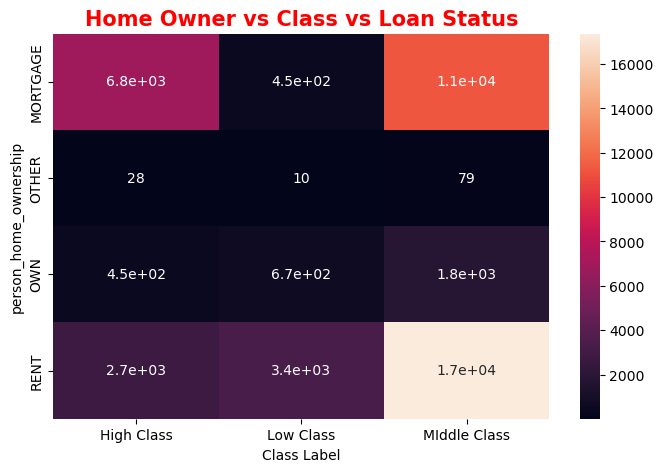

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot,annot=True)
plt.title('Home Owner vs Class vs Loan Status',color='red',weight='bold',fontsize=15)
plt.show()

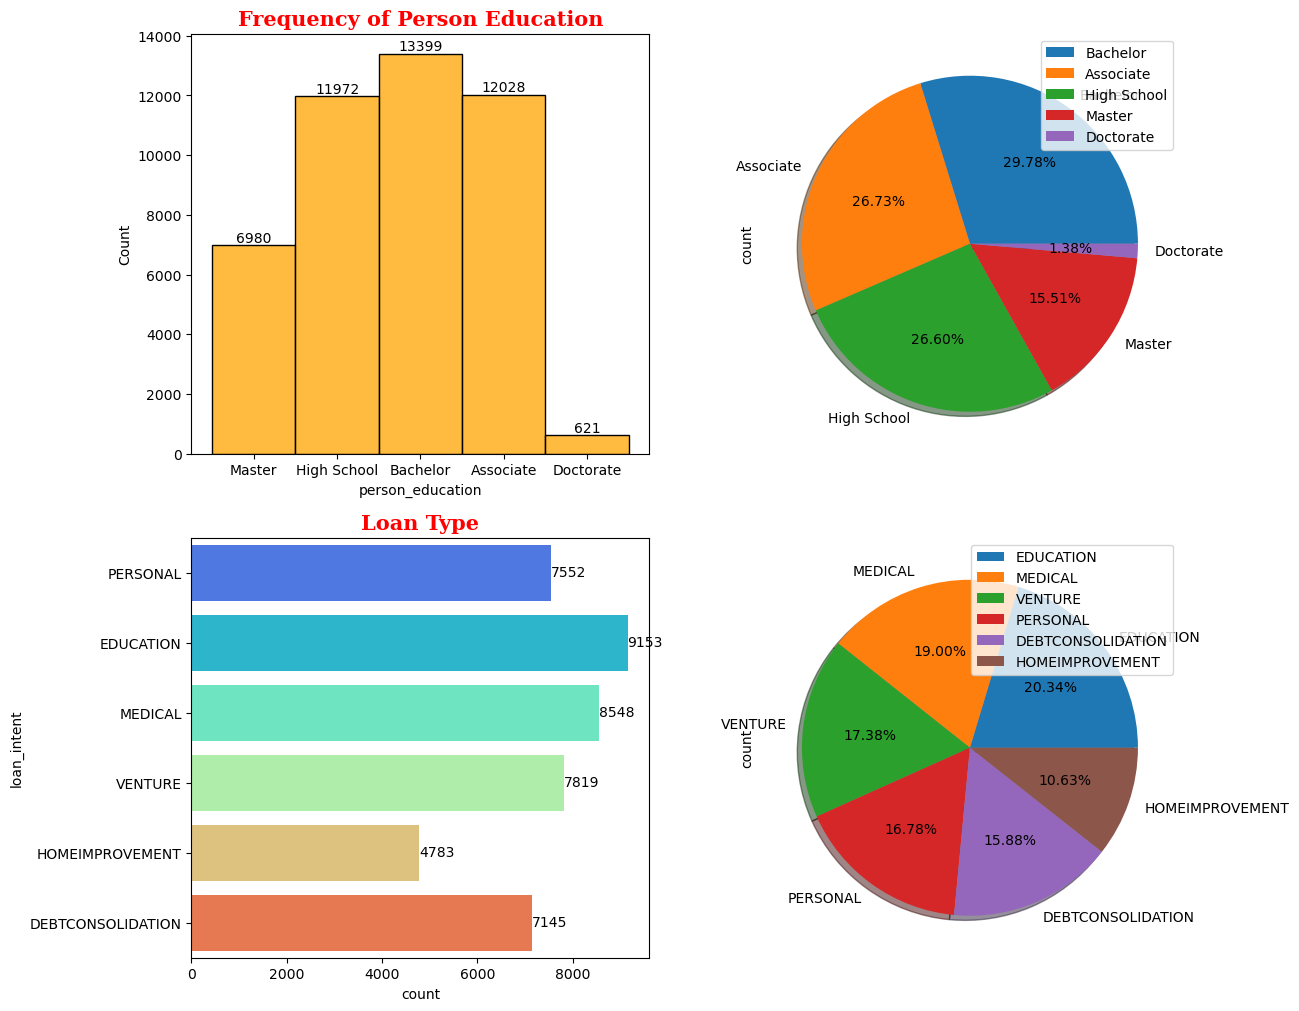

In [61]:
plt.figure(figsize=(13,12))
plt.subplot(2,2,1)
ax=sns.histplot(df['person_education'],color='orange')
ax.bar_label(ax.containers[0])
plt.title('Frequency of Person Education',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})

plt.subplot(2,2,2)
df['person_education'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%')
plt.legend(loc='upper right')

plt.subplot(2,2,3)
ax=sns.countplot(y=df['loan_intent'],color='orange',palette='rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
plt.title('Loan Type',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})

plt.subplot(2,2,4)
df['loan_intent'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%')
plt.legend(loc='upper right')
plt.show()

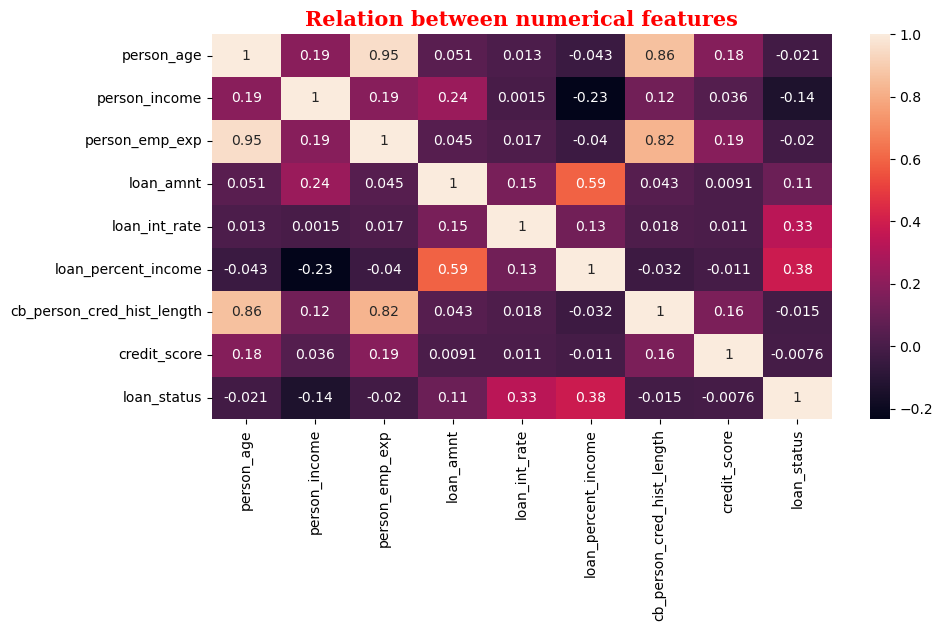

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.select_dtypes(include='number').corr(),annot=True)
plt.title('Relation between numerical features',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
plt.show()

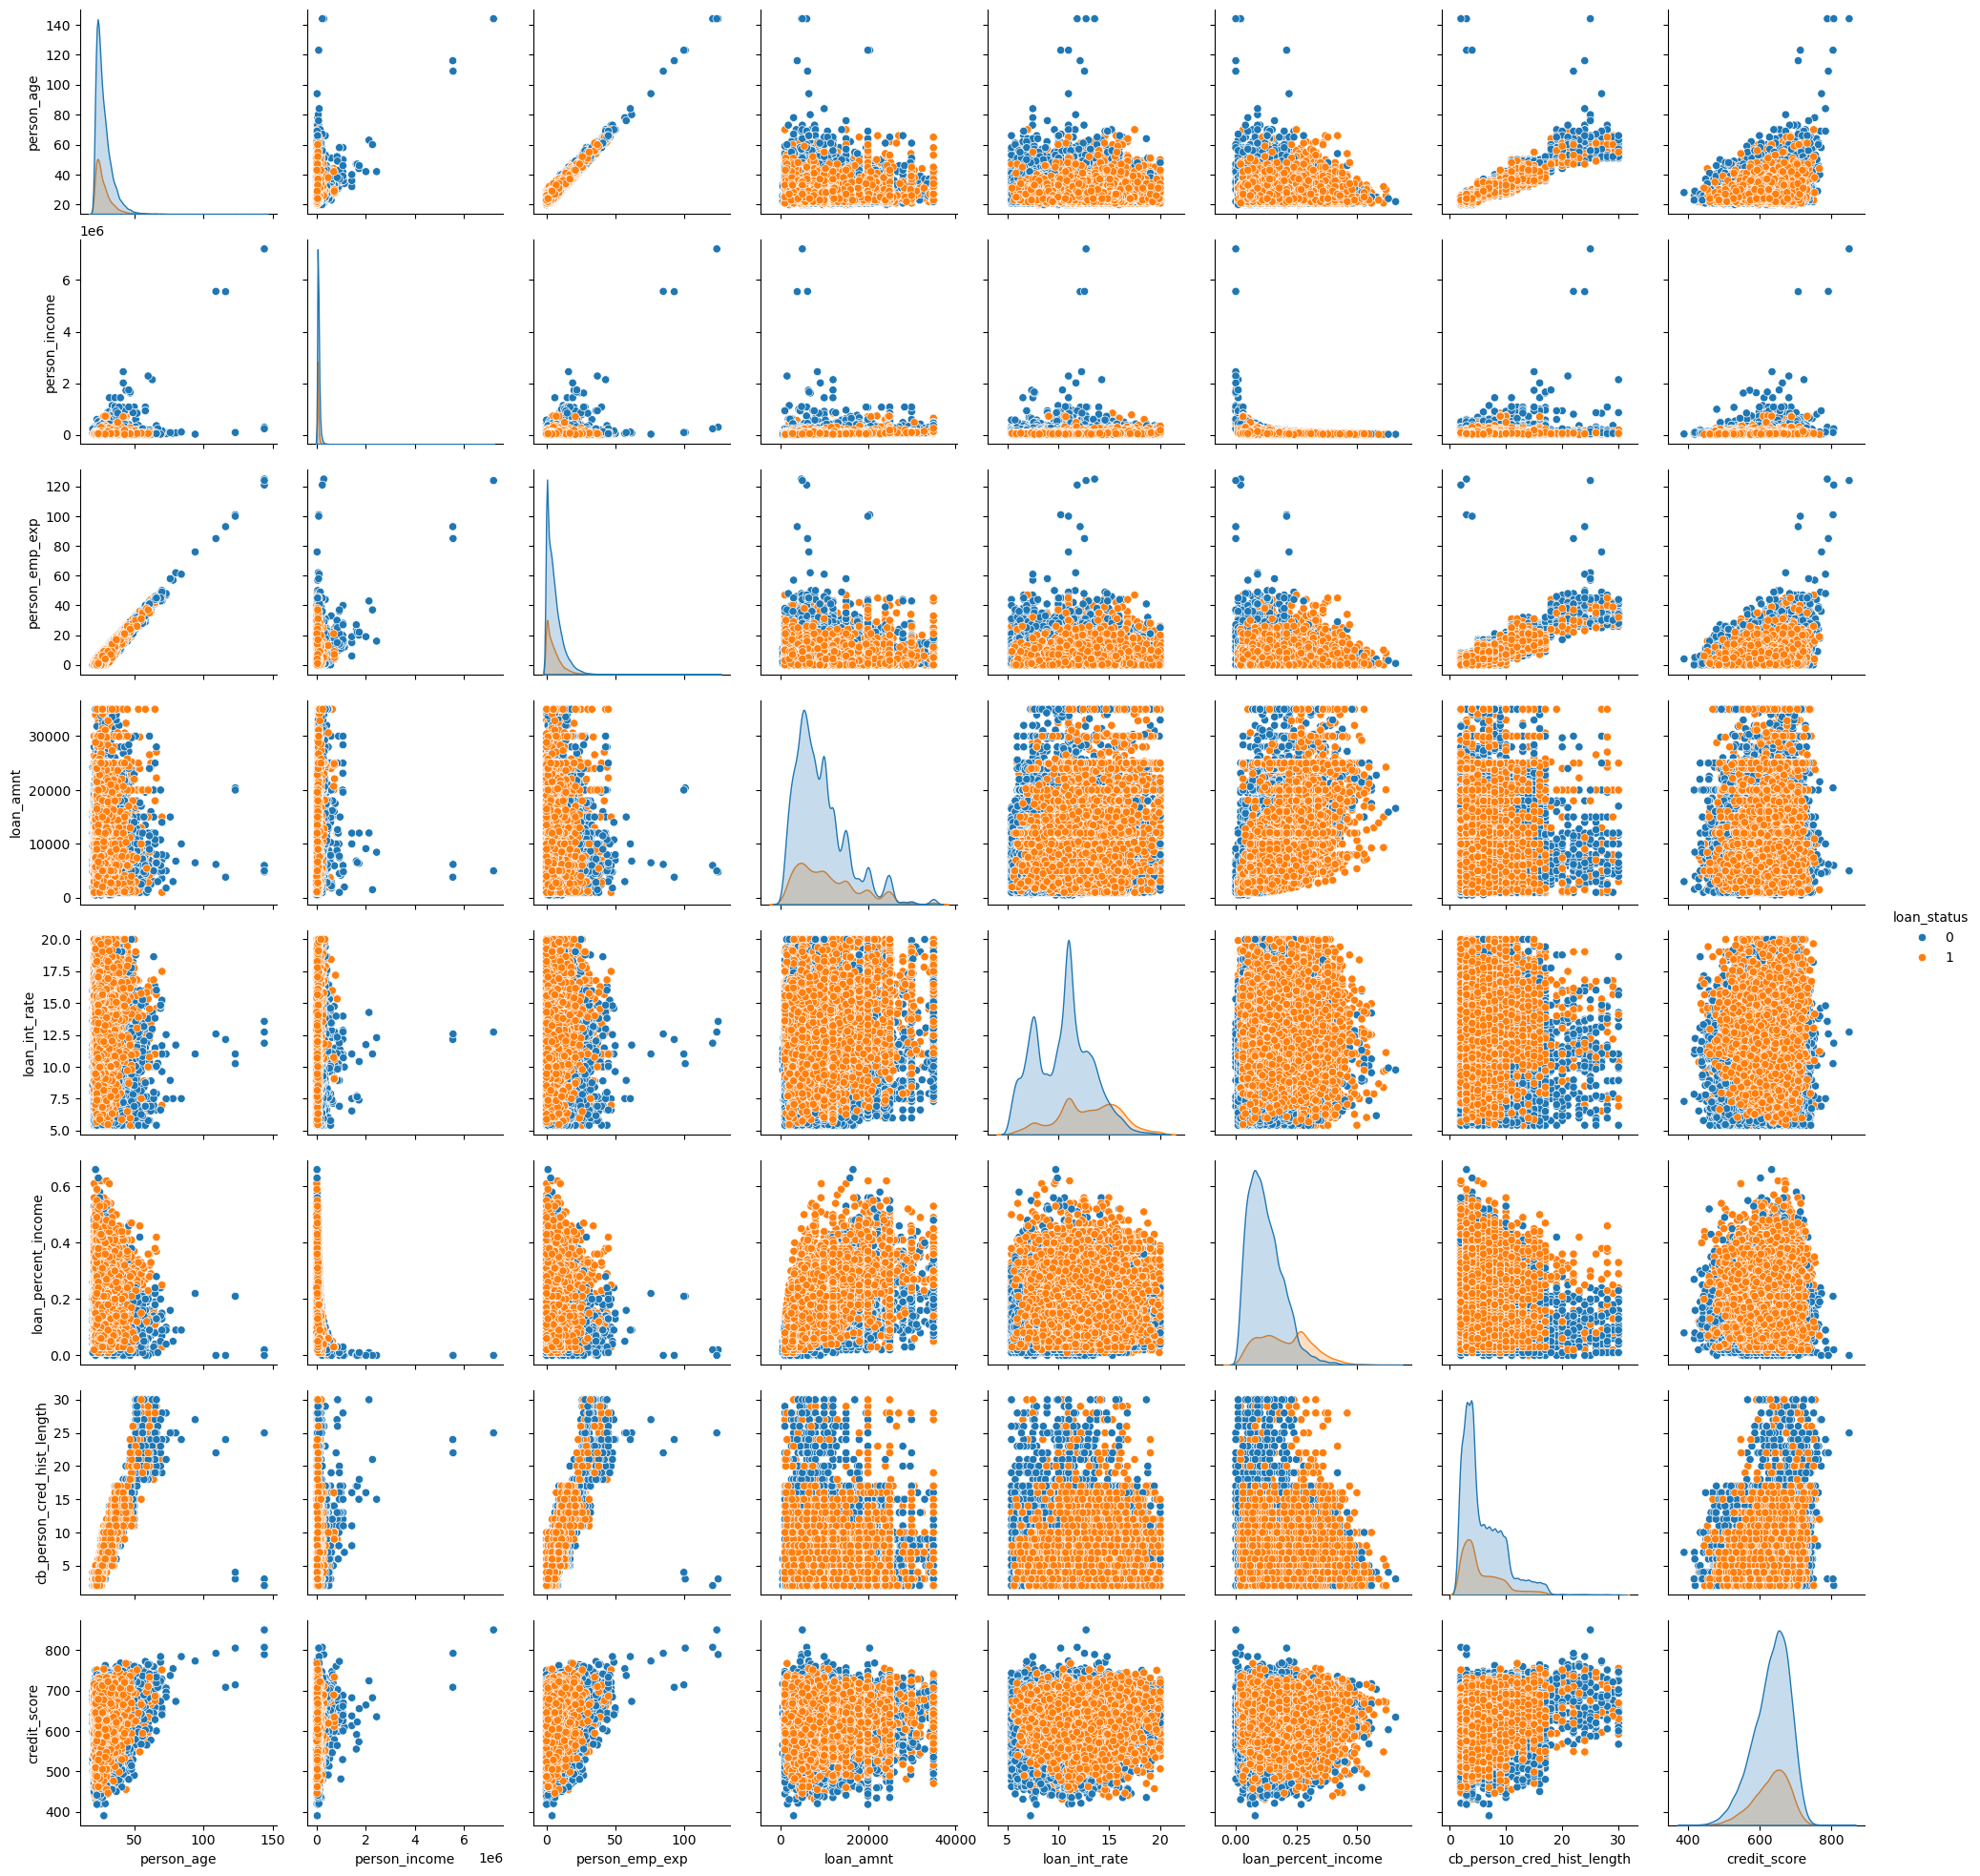

In [65]:
sns.pairplot(data=df,hue='loan_status')
plt.show()

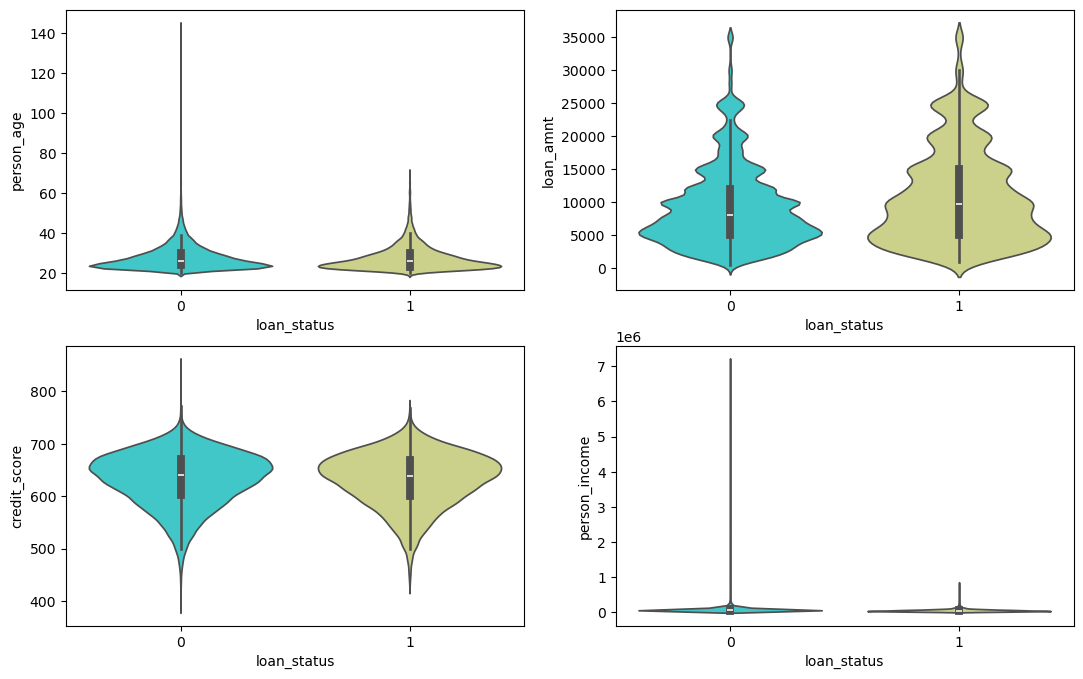

In [9]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sns.violinplot(x='loan_status',y='person_age',data=df,palette='rainbow')

plt.subplot(2,2,2)
sns.violinplot(x='loan_status',y='loan_amnt',data=df,palette='rainbow')

plt.subplot(2,2,3)
sns.violinplot(x='loan_status',y='credit_score',data=df,palette='rainbow')

plt.subplot(2,2,4)
sns.violinplot(x='loan_status',y='person_income',data=df,palette='rainbow')

plt.show()

## Playing with Outliers

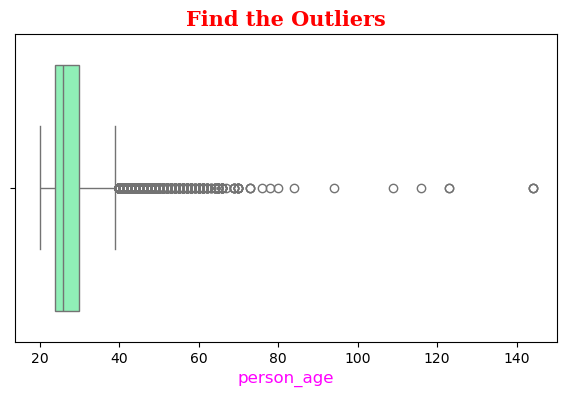

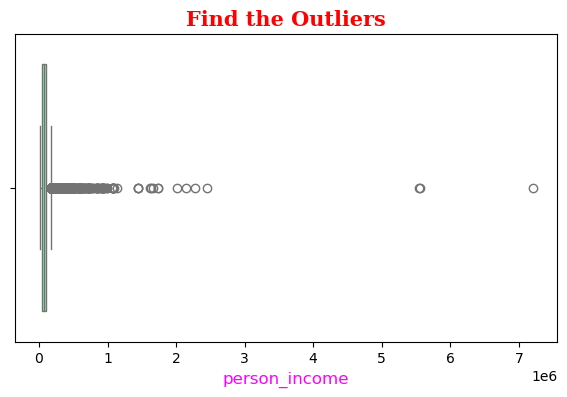

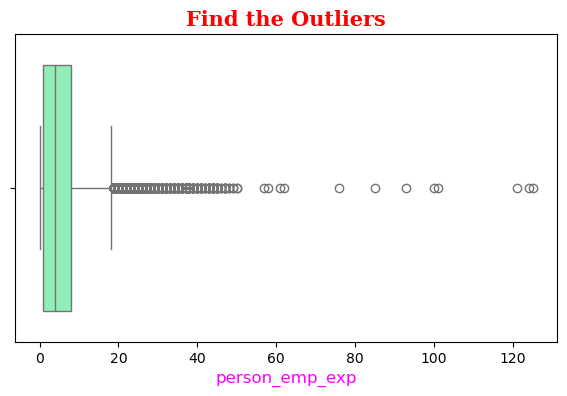

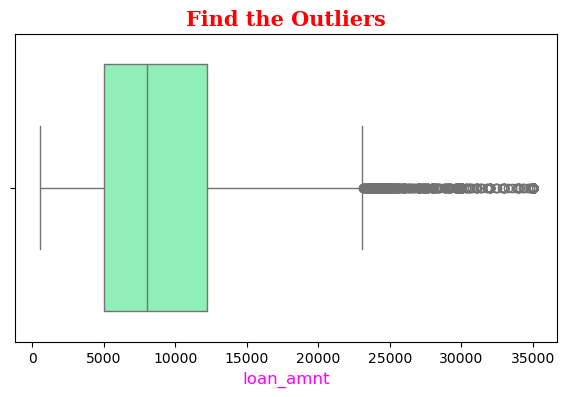

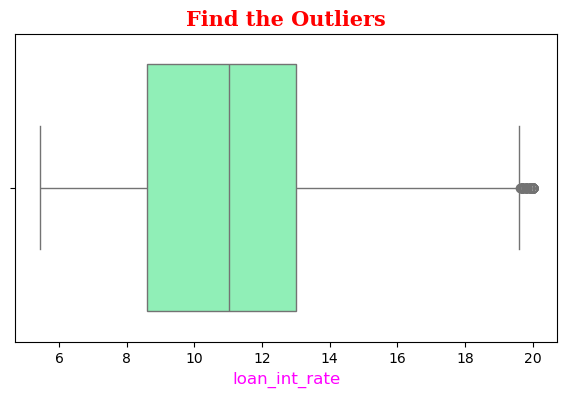

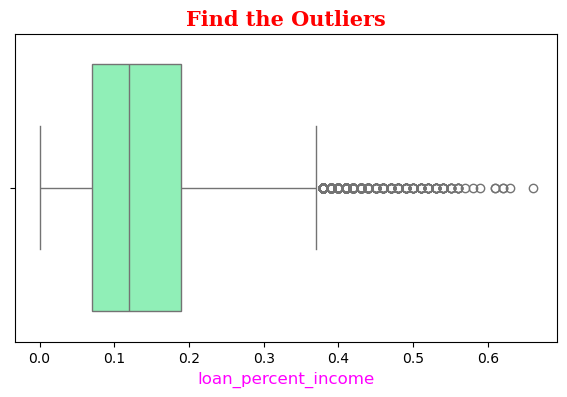

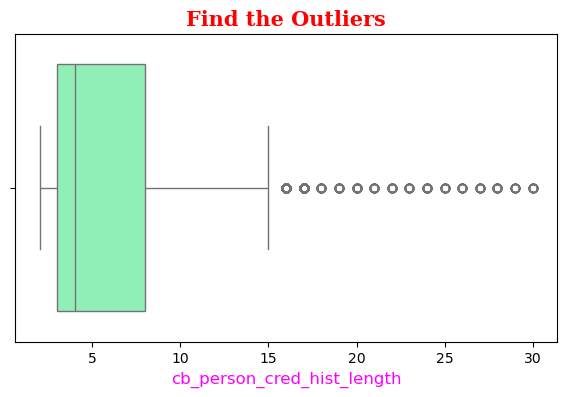

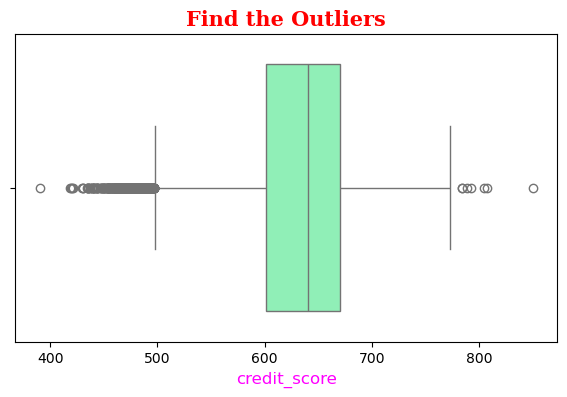

In [51]:
num_cols= df.select_dtypes(include='number').columns
num_cols1=num_cols.drop(['loan_status'])
for i in num_cols1:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[i],palette='rainbow')
    plt.title('Find the Outliers',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
    plt.xlabel(i,fontsize=12,color='magenta')
    plt.show()

In [52]:
## Capping the Outliers Becuse we have lot of outliers present
for col in num_cols1:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap the outliers using np.where
    df[col] = np.where(
        df[col] > upper_limit, upper_limit,
        np.where(df[col] < lower_limit, lower_limit, df[col])
    )

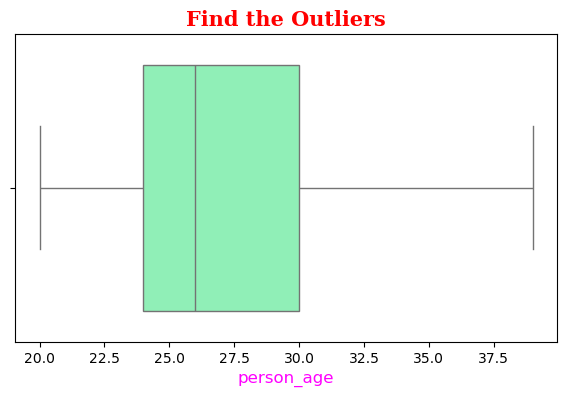

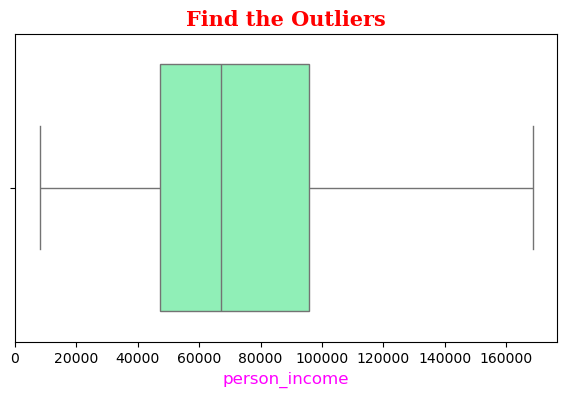

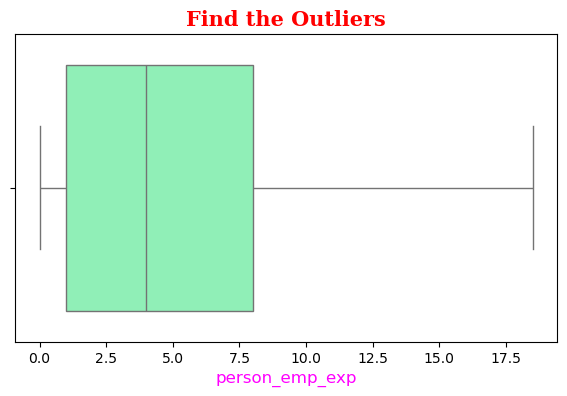

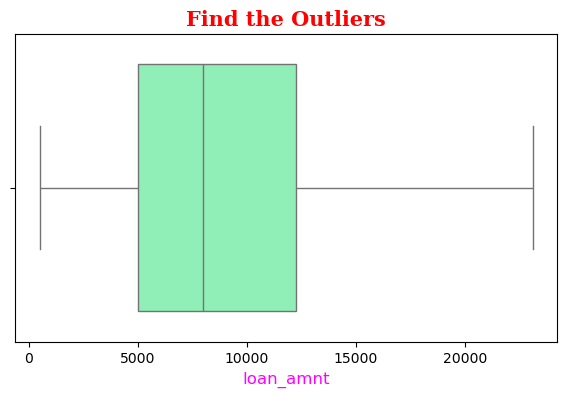

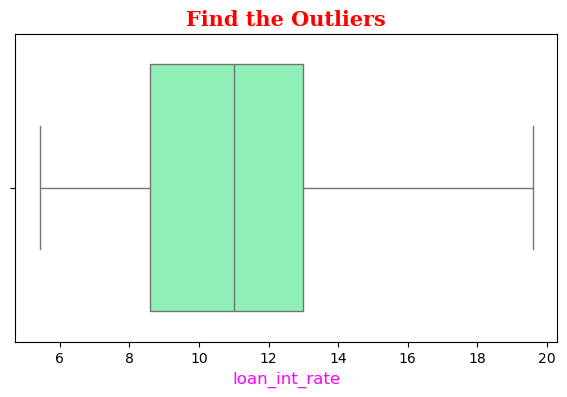

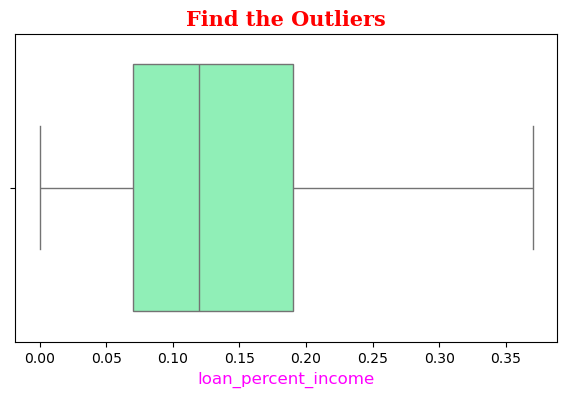

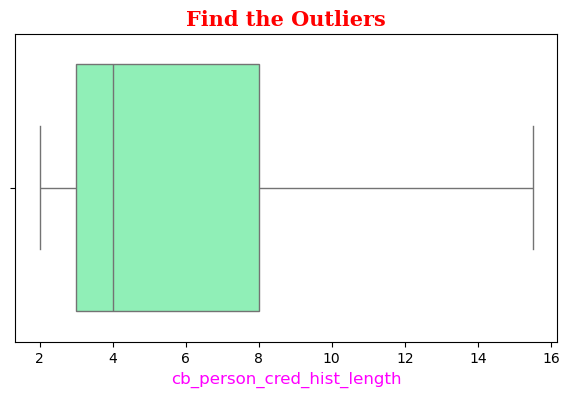

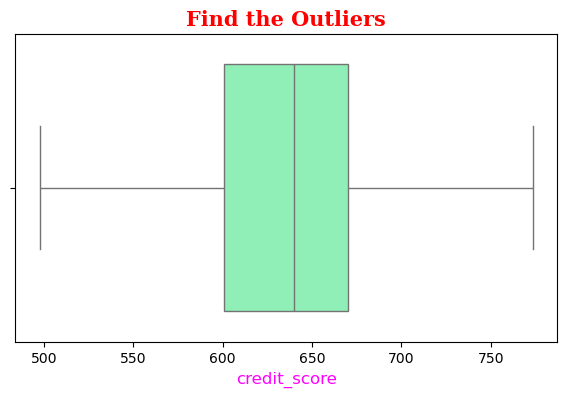

In [53]:
for i in num_cols1:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[i],palette='rainbow')
    plt.title('Find the Outliers',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
    plt.xlabel(i,fontsize=12,color='magenta')
    plt.show()

In [54]:
df.shape

(45000, 15)

In [25]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   45000.000000    45000.000000  45000.000000   
mean      27.444733   75677.400428        5.170311   9411.042900   
std        4.930055   38071.779506        5.137068   5832.950765   
min       20.000000    8000.000000        0.000000    500.000000   
25%       24.000000   47204.000000        1.000000   5000.000000   
50%       26.000000   67048.000000        4.000000   8000.000000   
75%       30.000000   95789.250000        8.000000  12237.250000   
max       39.000000  168667.125000       18.500000  23093.125000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.005676             0.138842                    5.783711   
std         2.976069             0.084360                    3.578787   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        19.590000             0.370000                   15.500000   

       credit_score   loan_status  
count   45000.00000  45000.000000  
mean      632.80830      0.222222  
std        49.80135      0.415744  
min       497.50000      0.000000  
25%       601.00000      0.000000  
50%       640.00000      0.000000  
75%       670.00000      0.000000  
max       773.50000      1.000000

# Feature Engeering

In [55]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [48]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [26]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [31]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['person_gender'].unique()

In [33]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
df['Class Label'].unique

<bound method Series.unique of 0        Middle Class
1           Low Class
2           Low Class
3        Middle Class
4        Middle Class
             ...     
44995    Middle Class
44996    Middle Class
44997    Middle Class
44998       Low Class
44999    Middle Class
Name: Class Label, Length: 45000, dtype: object>

In [60]:
cat_cols1= cat_cols.drop(['person_education','Class Label'])
df_scaled= pd.get_dummies(df,columns=cat_cols1,drop_first=False)
df_scaled['person_education']= df_scaled['person_education'].map({
     'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'Doctorate': 3,
    'Associate': 4
})
df_scaled['Class Label']= df_scaled['Class Label'].map({
     'Low Class': 0,
    'Middle Class': 1,
    'High Class': 2,
})

df_scaled.head()

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0        22.0                 2        71948.0             0.0  23093.125   
1        21.0                 0        12282.0             0.0   1000.000   
2        25.0                 0        12438.0             3.0   5500.000   
3        23.0                 1        79753.0             0.0  23093.125   
4        24.0                 2        66135.0             1.0  23093.125   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          16.02                 0.37                         3.0   
1          11.14                 0.08                         2.0   
2          12.87                 0.37                         3.0   
3          15.23                 0.37                         2.0   
4          14.27                 0.37                         4.0   

   credit_score  loan_status  ...  person_home_ownership_OWN  \
0         561.0            1  ...                      False   
1         504.0            0  ...                       True   
2         635.0            1  ...                      False   
3         675.0            1  ...                      False   
4         586.0            1  ...                      False   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                        True                          False   
1                       False                          False   
2                       False                          False   
3                        True                          False   
4                        True                          False   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                  False                        False                False   
1                   True                        False                False   
2                  False                        False                 True   
3                  False                        False                 True   
4                  False                        False                 True   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                  True                False   
1                 False                False   
2                 False                False   
3                 False                False   
4                 False                False   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                               True                               False  
1                              False                                True  
2                               True                               False  
3                               True                               False  
4                               True                               False  

[5 rows x 25 columns]

In [61]:
df_scaled=df_scaled.astype(int)
df_scaled.head()

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0          22                 2          71948               0      23093   
1          21                 0          12282               0       1000   
2          25                 0          12438               3       5500   
3          23                 1          79753               0      23093   
4          24                 2          66135               1      23093   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0             16                    0                           3   
1             11                    0                           2   
2             12                    0                           3   
3             15                    0                           2   
4             14                    0                           4   

   credit_score  loan_status  ...  person_home_ownership_OWN  \
0           561            1  ...                          0   
1           504            0  ...                          1   
2           635            1  ...                          0   
3           675            1  ...                          0   
4           586            1  ...                          0   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                           1                              0   
1                           0                              0   
2                           0                              0   
3                           1                              0   
4                           1                              0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                      0                            0                    0   
1                      1                            0                    0   
2                      0                            0                    1   
3                      0                            0                    1   
4                      0                            0                    1   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                     1                    0   
1                     0                    0   
2                     0                    0   
3                     0                    0   
4                     0                    0   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                                  1                                   0  
1                                  0                                   1  
2                                  1                                   0  
3                                  1                                   0  
4                                  1                                   0  

[5 rows x 25 columns]

In [65]:
df_scaled.shape

(45000, 25)

In [67]:
## Take x= Input variable & y= Output variable
x= df_scaled.drop(['loan_status'],axis=1)
y= df_scaled['loan_status']

In [70]:
x.head(3)

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0          22                 2          71948               0      23093   
1          21                 0          12282               0       1000   
2          25                 0          12438               3       5500   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0             16                    0                           3   
1             11                    0                           2   
2             12                    0                           3   

   credit_score  Class Label  ...  person_home_ownership_OWN  \
0           561            1  ...                          0   
1           504            0  ...                          1   
2           635            0  ...                          0   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                           1                              0   
1                           0                              0   
2                           0                              0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                      0                            0                    0   
1                      1                            0                    0   
2                      0                            0                    1   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                     1                    0   
1                     0                    0   
2                     0                    0   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                                  1                                   0  
1                                  0                                   1  
2                                  1                                   0  

[3 rows x 24 columns]

In [69]:
y.head(3)

0    1
1    0
2    1
Name: loan_status, dtype: int32

In [72]:
## Feature Scaling using Standardization Technique
from sklearn.preprocessing import StandardScaler
scaling= StandardScaler()
scaling.fit(x)
df_final= pd.DataFrame(scaling.transform(x),columns=x.columns)
df_final.head()

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0   -1.104408          0.183000      -0.097958       -1.012419   2.345666   
1   -1.307248         -1.117330      -1.665174       -1.012419  -1.442006   
2   -0.495889         -1.117330      -1.661076       -0.422793  -0.670517   
3   -0.901569         -0.467165       0.107052       -1.012419   2.345666   
4   -0.698729          0.183000      -0.250645       -0.815877   2.345666   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0       1.833021                  0.0                   -0.782439   
1       0.169656                  0.0                   -1.065057   
2       0.502329                  0.0                   -0.782439   
3       1.500348                  0.0                   -1.065057   
4       1.167675                  0.0                   -0.499820   

   credit_score  Class Label  ...  person_home_ownership_OWN  \
0     -1.441410    -0.222204  ...                  -0.264915   
1     -2.585656    -2.026458  ...                   3.774794   
2      0.044101    -2.026458  ...                  -0.264915   
3      0.847081    -0.222204  ...                  -0.264915   
4     -0.939548    -0.222204  ...                  -0.264915   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                    0.958931                       -0.43445   
1                   -1.042827                       -0.43445   
2                   -1.042827                       -0.43445   
3                    0.958931                       -0.43445   
4                    0.958931                       -0.43445   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0              -0.505307                    -0.344862            -0.484252   
1               1.978995                    -0.344862            -0.484252   
2              -0.505307                    -0.344862             2.065040   
3              -0.505307                    -0.344862             2.065040   
4              -0.505307                    -0.344862             2.065040   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0              2.226811             -0.45858   
1             -0.449073             -0.45858   
2             -0.449073             -0.45858   
3             -0.449073             -0.45858   
4             -0.449073             -0.45858   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                           1.016040                           -1.016040  
1                          -0.984213                            0.984213  
2                           1.016040                           -1.016040  
3                           1.016040                           -1.016040  
4                           1.016040                           -1.016040  

[5 rows x 24 columns]

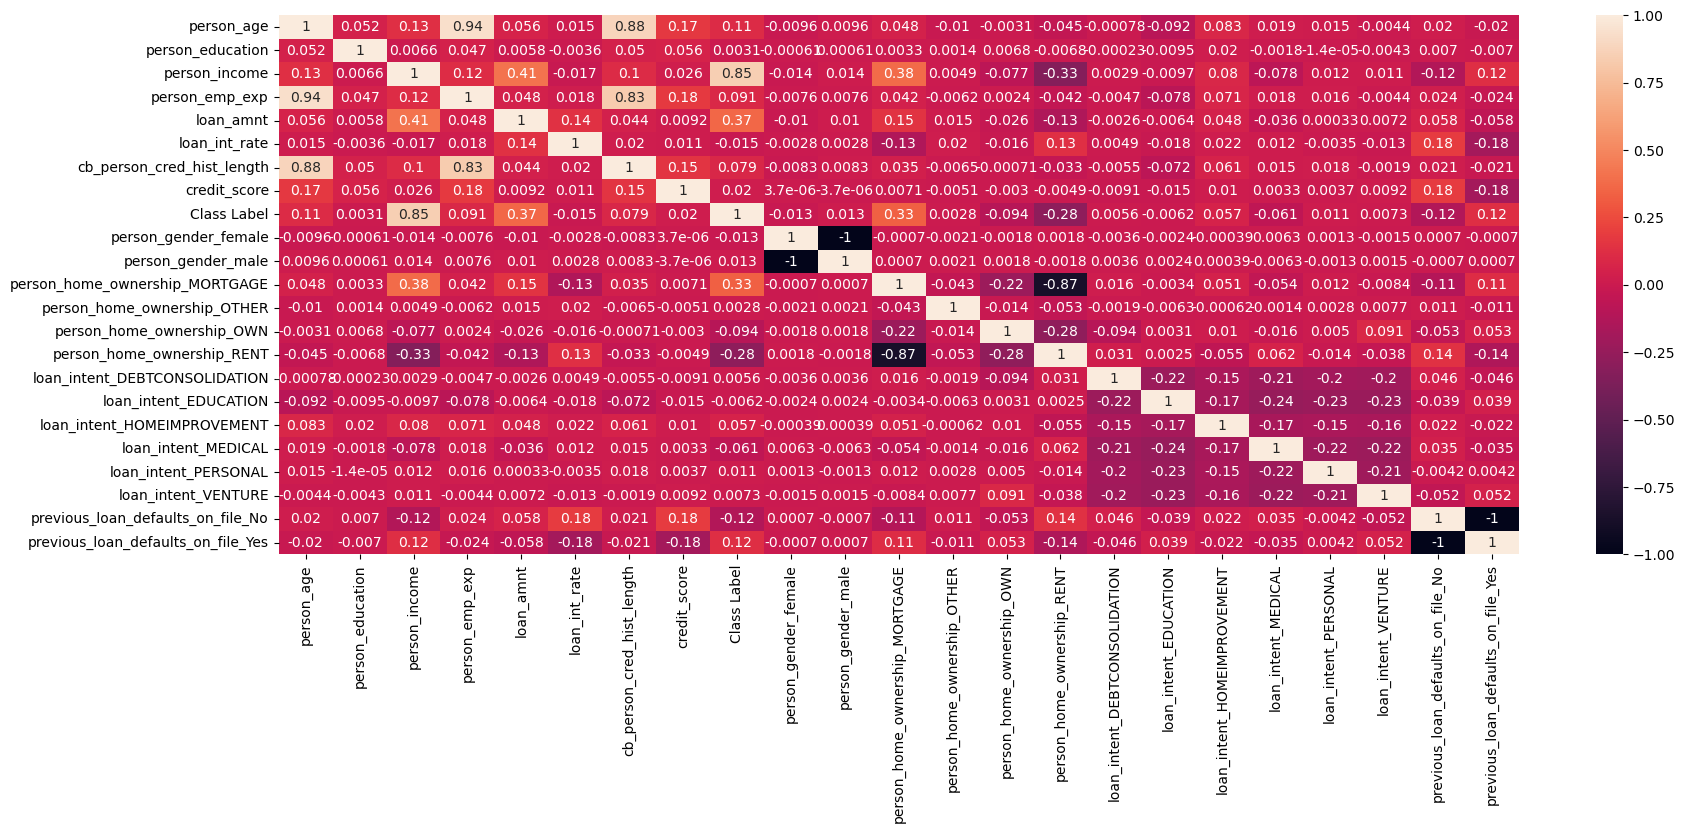

In [82]:
## Find Relation between input & output features
plt.figure(figsize=(20,7))
sns.heatmap(data=df_final.corr(),annot=True)
plt.show()

In [85]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(df_final,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((36000, 23), (9000, 23), (36000,), (9000,))

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report

## Build Ml Model

In [90]:
## Build Ml Model
models= {
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes GaussianNB':GaussianNB(),
    'Naive Bayes BernouliNB':BernoulliNB(),
    'KNN':KNeighborsClassifier(),
    'Decision Tree Classifiers':DecisionTreeClassifier(),
    'Random Forest Classifiers':RandomForestClassifier(),
    'SVC':SVC(),
}

In [99]:
result= []
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc= accuracy_score(y_pred,y_test)*100
    f1=f1_score(y_pred,y_test)*100
    recall= recall_score(y_pred,y_test)*100
    precision= precision_score(y_pred,y_test)*100
    result.append({
        'model':name,
        'Accuracy':round(acc,2),
        'f1_score':round(f1,2),
        'recall_score':round(recall,2),
        'Precision Score':round(precision,2)
    })
    

In [100]:
result

[{'model': 'Logistic Regression',
  'Accuracy': 88.94,
  'f1_score': 75.24,
  'recall_score': 75.26,
  'Precision Score': 75.22},
 {'model': 'Naive Bayes GaussianNB',
  'Accuracy': 73.51,
  'f1_score': 62.77,
  'recall_score': 45.74,
  'Precision Score': 100.0},
 {'model': 'Naive Bayes BernouliNB',
  'Accuracy': 83.92,
  'f1_score': 69.8,
  'recall_score': 60.12,
  'Precision Score': 83.18},
 {'model': 'KNN',
  'Accuracy': 88.64,
  'f1_score': 73.08,
  'recall_score': 77.66,
  'Precision Score': 69.0},
 {'model': 'Decision Tree Classifiers',
  'Accuracy': 89.42,
  'f1_score': 76.47,
  'recall_score': 75.98,
  'Precision Score': 76.97},
 {'model': 'Random Forest Classifiers',
  'Accuracy': 92.18,
  'f1_score': 81.65,
  'recall_score': 85.76,
  'Precision Score': 77.91},
 {'model': 'SVC',
  'Accuracy': 91.01,
  'f1_score': 79.1,
  'recall_score': 82.27,
  'Precision Score': 76.17}]

In [103]:
print('Random Forest Gives High & better accuracy than other models:-Accuracy is 92.18%')

Random Forest Gives High & better accuracy than other models:-Accuracy is 92.18%


## K-fold cross Validation

In [107]:
## Use for Random Forest
random_forest_model= RandomForestClassifier()
from sklearn.model_selection import cross_val_score
random_val_score= cross_val_score(random_forest_model,df_final,y,cv=5,scoring='accuracy')
print("Random forest Cross-validation scores:", random_val_score)
print("Mean Accuracy:", val_score.mean()*100)

Random forest Cross-validation scores: [0.91266667 0.91255556 0.914      0.92577778 0.93033333]
Mean Accuracy: 91.83111111111111


In [114]:
## Use for Logistic Regression
logistic_model= LogisticRegression()
from sklearn.model_selection import cross_val_score
logistic_val_score= cross_val_score(logistic_model,df_final,y,cv=5,scoring='accuracy')
print("Logistic Regression Cross-validation scores:", logistic_val_score)
print("Mean Accuracy:", logistic_val_score.mean()*100)

Logistic Regression Cross-validation scores: [0.88411111 0.89277778 0.87522222 0.889      0.89522222]
Mean Accuracy: 88.72666666666667


In [115]:
## Use for Naive Bayes
naive_bayes_model= GaussianNB()
from sklearn.model_selection import cross_val_score
bayes_val_score= cross_val_score(naive_bayes_model,df_final,y,cv=5,scoring='accuracy')
print("Naive Bayes Cross-validation scores:", bayes_val_score)
print("Mean Accuracy:", bayes_val_score.mean()*100)

Naive Bayes Cross-validation scores: [0.74111111 0.73911111 0.72111111 0.71833333 0.73866667]
Mean Accuracy: 73.16666666666667


In [117]:
## Use for Decision Tress
tree_model= DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
tree_val_score= cross_val_score(tree_model,df_final,y,cv=10,scoring='accuracy')
print("Decision tree Cross-validation scores:", val_score)
print("Mean Accuracy:", tree_val_score.mean()*100)

Decision tree Cross-validation scores: [0.91266667 0.91322222 0.91222222 0.92444444 0.929     ]
Mean Accuracy: 89.19111111111111


In [119]:
## Use for KNN
knn_model= KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
knn_val_score= cross_val_score(knn_model,df_final,y,cv=5,scoring='accuracy')
print("KNN Cross-validation scores:", knn_val_score)
print("Mean Accuracy:", knn_val_score.mean()*100)

KNN Cross-validation scores: [0.88088889 0.88766667 0.87611111 0.87866667 0.89155556]
Mean Accuracy: 88.29777777777778


In [120]:
## Use for SVC
svc_model= SVC()
from sklearn.model_selection import cross_val_score
svc_val_score= cross_val_score(svc_model,df_final,y,cv=5,scoring='accuracy')
print("SVC Cross-validation scores:", svc_val_score)
print("Mean Accuracy:", svc_val_score.mean()*100)

SVC Cross-validation scores: [0.90622222 0.91233333 0.90388889 0.90911111 0.919     ]
Mean Accuracy: 91.01111111111113


## Conculsion
- **We deploy Random forest model becuse it`s gives best accuracy & accuracy is 92.18%**